In [1]:
import random       # after this, random.random() gives a uniform [0,1] value
import numpy as np  # numpy is the Python matrix package
"""
Generate a random graph by coin flipping. The input is a square matrix P with entries 
between 0 and 1. The result is a 0 or 1 adjacency matrix for the random graph. 

Example: 
  coinflip(0.25*np.ones((8,8))) # generate a random Erdos-Renyi graph
"""
def coinflip(P):
  n = P.shape[0]
  assert(n == P.shape[1]) # make sure we have a square input
  A = np.zeros_like(P)    # create an empty adjacency matrix
  for j in range(n):
    for i in range(n):    # fill in each entry as 1 with prob P[i,j]
      A[i,j] = random.random() <= P[i,j]  
  return A

# Run the example
coinflip(0.25*np.ones((8,8))) # generate a random Erdos-Renyi graph

In [28]:
import random      # random.randint(a,b) gives a uniform int from a to b
import numpy as np # numpy is the Python matrix package
"""
Generate a random Erdos-Renyi graph by ball-dropping. The input is:
   n: the number of nodes
   p: the probability of an edge
The result is a list of directed edges. 

Example:
  ball_drop_er(8,0.25) # 8 node Erdos-Renyi with probability 0.25
"""
def ball_drop_er(n,p):
    m = int(np.random.binomial(n*n,p))      # the number of edges
    edges = set()                           # store the set of edges
    while len(edges) < m:
        # the entire ball drop procedure is one line, we use python indices in 0,n-1 here
        e = (random.randint(0,n-1),random.randint(0,n-1))
        if e not in edges:                  # check for duplicates
            edges.add(e)                    # add it to the list
    return list(edges)                      # convert the set into a list

# Run the example
ball_drop_er(8,0.25) # 8 node Erdos-Renyi with probability 0.25

[(6, 0),
 (7, 3),
 (5, 4),
 (4, 6),
 (6, 6),
 (3, 0),
 (7, 6),
 (3, 1),
 (4, 7),
 (1, 4),
 (0, 2),
 (7, 4),
 (7, 5),
 (1, 6),
 (5, 0),
 (2, 2),
 (0, 4),
 (2, 4)]

In [2]:
import numpy as np # numpy is the Python matrix package and np.random.geometric
                   # is a geometric random variate generator
"""
Generate a random Erdos-Renyi graph by grass-hopping. The input is:
   n: the number of nodes
   p: the probability of an edge
The result is a list of directed edges. 

Example:
  grass_hop_er(8,0.25) # 8 node Erdos-Renyi with probability 0.25
"""
def grass_hop_er(n,p):
    edgeindex = -1                   # we label edges from 0 to n^2-1
    gap = np.random.geometric(p)     # first distance to edge
    edges = []
    while edgeindex+gap < n*n:       # check to make sure we have a valid index
        edgeindex += gap             # increment the index
        src = edgeindex // n         # use integer division, gives src in [0, n-1]
        dst = edgeindex - n*src      # identify the column 
        edges.append((src,dst))
        gap = np.random.geometric(p) # generate the next gap
    return edges

# Run the example
grass_hop_er(8,0.25) # 8 node Erdos-Renyi with probability 0.25

[(0, 5),
 (0, 6),
 (0, 7),
 (1, 3),
 (1, 7),
 (2, 0),
 (2, 5),
 (3, 4),
 (3, 6),
 (4, 2),
 (6, 2),
 (6, 5),
 (7, 0),
 (7, 2),
 (7, 3),
 (7, 4)]

In [3]:
""" Generate edges for a stochastic block model with two blocks.
n1 and n2 are the sizes of the two blocks and p is the within group
probability and q is the between group probability. 
Example: sbm2(20,15,0.5,0.1) # 20 nodes in group 1, 15 nodes in group 2, ...
"""
def sbm2(n1,n2,p,q):
  edges = grass_hop_er(n1,p)                             # generate the n1-by-n1 block
  edges.extend( [ (i+n1,j+n1) for i,j in grass_hop_er(n2,p) ])        # n2-by-n2 block
  edges.extend( [ (i,j+n1) for i,j in grass_hop_er(max(n1,n2),q) if i < n1 and j < n2])
  edges.extend( [ (i+n1,j) for i,j in grass_hop_er(max(n1,n2),q) if i < n2 and j < n1])
  return edges

# Run the example
sbm2(20,15,0.5,0.1) # 20 nodes in group 1, 15 nodes in group 2, ...

[(0, 5),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 12),
 (0, 13),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 19),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 6),
 (1, 8),
 (1, 10),
 (1, 11),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 18),
 (1, 19),
 (2, 0),
 (2, 2),
 (2, 4),
 (2, 7),
 (2, 9),
 (2, 10),
 (2, 12),
 (3, 1),
 (3, 5),
 (3, 7),
 (3, 9),
 (3, 11),
 (3, 12),
 (3, 14),
 (3, 16),
 (3, 17),
 (4, 0),
 (4, 3),
 (4, 4),
 (4, 8),
 (4, 9),
 (4, 11),
 (4, 13),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 11),
 (5, 15),
 (5, 18),
 (5, 19),
 (6, 0),
 (6, 1),
 (6, 3),
 (6, 4),
 (6, 7),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 15),
 (7, 1),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 10),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (7, 19),
 (8, 1),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (8, 13),
 (8, 18),
 (9, 2),
 (9, 3),
 (9, 8),
 (9, 9),
 (9, 12),
 (9, 14),
 (9, 15),
 (9, 17),
 (9, 19),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 4),
 (10, 7),
 (10, 10),
 (10, 12),
 (10, 13),
 (10, 14),
 (10, 17),
 (11, 0),
 (11, 3),
 (11, 6),
 

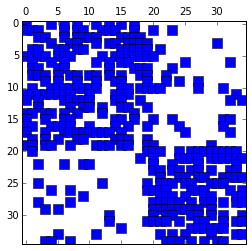

In [27]:
# Show a plot of the sbm
# http://stackoverflow.com/questions/18651869/scipy-equivalent-for-matlab-spy
%matplotlib inline
import matplotlib.pylab as plt
import scipy.sparse as sps
edges = sbm2(20,15,0.5,0.1)
data = np.array([1 for _ in edges])
row = np.array([e[0] for e in edges])
col = np.array([e[1] for e in edges])
A = sps.csr_matrix((data, (row,col)))
#?sps.coo_matrix
plt.spy(A)
#plt.show()



In [30]:
def next_region(cur, m):
  k = len(cur)
  cur[k-1] += 1      # increment the last element 
  if cur[k-1] == m:  # if there is spill 
    if len(cur) > 1: # there is an array
      cur[0:k-1] = next_region(cur[0:-1],m) # recur on prefix
      cur[k-1] = cur[k-2]                    # update suffix
    else:
      cur[k-1] = -1   # singleton, no room left! 
  return cur


""" Generate the set of Erdos-Reyni regions in a Kronecker graph
where v = vec(K), and k = number of levels. Each region gives indices
into v that produce a distinct Erdos-Reyni probability. 
Example: regions([0.99,0.5,0.5,0.2],3) """
def regions(v,k):
  m = len(v)
  rval = []
  cur = [ 0 for _ in xrange(k) ] # initialize the regions to zero
  while cur[0] != -1:
    rval.append(list(cur)) # make a copy
    next_region(cur, m)
  return rval

# Run the example
regions([0.99,0.5,0.5,0.2],3)

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 0, 3],
 [0, 1, 1],
 [0, 1, 2],
 [0, 1, 3],
 [0, 2, 2],
 [0, 2, 3],
 [0, 3, 3],
 [1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 [1, 2, 2],
 [1, 2, 3],
 [1, 3, 3],
 [2, 2, 2],
 [2, 2, 3],
 [2, 3, 3],
 [3, 3, 3]]

In [36]:
# unrank takes as input:
# - C: a multiset represented by a list
# - n: the lexicographic rank to find
# and returns the nth permutation of C in 
# lexicographic order.
#
# Examples:
# unrank([0,1,1,3], 0) returns [0,1,1,3]
# unrank([0,1,1,3], 1) returns [0,1,3,1]
# unrank([0,1,1,3], 2) returns [0,3,1,1]

from math import factorial 

def ndseq_to_counter(seq):
  mset = {}
  for c in seq:
    # get a value with a default
    # of zero if it isn't there
    mset[c] = mset.get(c,0)+1
  return mset, sorted(mset.keys())
  
def counter_to_ndseq(mset,keys):
  seq = []
  for k in keys: # keys in sorted order
    # append k mset[k] times
    for v in xrange(mset[k]):
      seq.append(k) 
  return seq

def num_multiset_permutations(mset):
  count = factorial(sum(mset.values()))
  for k in mset.keys():
    count = count//factorial(mset[k])
  return count
  
def unrank_mset_counter(mset,keys,n):
  if n==0:       # easy if rank == 0
    return counter_to_ndseq(mset,keys)
  for s in keys: # else find prefix key
    mset[s] -= 1 # decrease count of s
    # determine number of prefixes with s
    place = num_multiset_permutations(mset)
    if place > n:
      # then the first element is s
      if mset[s] == 0: # remove the key
        keys.remove(s) # if the count is 0
      suffix = unrank_mset_counter(
                mset, keys, n) # recurse!
      suffix.insert(0, s)      # append s
      return suffix
    else:  # here it does not start with s
      mset[s] += 1 # restore the count
      n -= place   # update search offset
  raise(ValueError("rank too large"))
  
def unrank(seq,n): 
  mset,keys = ndseq_to_counter(seq)
  return unrank_mset_counter(mset,keys,n)

# Run the examples
print unrank([0,1,1,3], 0)
print unrank([0,1,1,3], 1)
print unrank([0,1,1,3], 2)

[0, 1, 1, 3]
[0, 1, 3, 1]
[0, 3, 1, 1]


In [63]:
import numpy as np # use np.random.geometric for the geometric random variables 
# grass_hop_region takes as input
# - r: the region to be sampled represented by a non-decreasing array      
# - v: the initiator matrix represented as a n^2-by-1 column vector
# and returns a list of edges represented by indexes in mult. table
# Example: v = [0.99,0.5,0.5,0.2]; grass_hop_region(regions(v,3)[2], v)
def grass_hop_region(r,v):
    p = multtable(r,v)               # p is the common prob value of the region
    n = num_multiset_permutations(ndseq_to_counter(r)[0]) # total size of region
    edges_mult = []                  # the initially empty list of edges 
    i = -1                           # starting index of the grass-hopping 
    gap = np.random.geometric(p)     # the first hop
    while i+gap < n:                 # check to make sure we haven't hopped out
        i += gap                     # increment the current index
        edges_mult.append(unrank(r,i))  # add the 
        gap = np.random.geometric(p) # generate the next gap
    return edges_mult

# multtable takes as input:
# - r: an array with k elements specifying a cell in the multiplication table
# - v: the initiator matrix represented as a n^2-by-1 column vector
# and returns the value at the specified location in the multiplication table
def multtable(r,v):
    final = 1.0
    for val in r:
        final *= v[val]
    return final

# Run the example
v = [0.99,0.5,0.5,0.2]; grass_hop_region(regions(v,3)[2], v)

[[0, 2, 0]]

In [67]:
""" Map a multi-index from the mult. table 
table to a row and column in the Kronecker 
matrix. The input is:
  mind: the multi-index for the mult table
  n: the size of the initiator matrix K
Example:
  map_mult_to_kron([1,3],2)   # = (3,1)
  map_mult_to_kron([4,0,7],3) # = (10,11)
"""
def map_mult_to_kron(mind,n):
  I = multiindex_to_linear(mind,n*n)
  return morton_decode(I,n)
  
def multiindex_to_linear(mind,n2):
  I = 0
  base = 1
  for i in xrange(len(mind)-1,-1,-1):
    I += mind[i]*base
    base *= n2
  return I
  
  
def morton_decode(I,n):
  row = 0
  rowbase = 1
  col = 0
  colbase = 1
  i = 0
  while I > 0:
    digit = I%n 
    I = I // n
    if i%2 == 0:
      row += rowbase*digit
      rowbase *= n
    else:
      col += colbase*digit
      colbase *= n
    i += 1
  return (row,col)

# Run the example
map_mult_to_kron([1,3],2)   # = (3,1)
map_mult_to_kron([4,0,7],3) # = (10,11)

(10, 11)

In [74]:
""" Generate a Kronecker graph via grass-hopping. The input K is the
Kronecker initiator matrix and the the value k is the number of levels. 
Example: grass_hop_kron([[0.99,0.5],[0.5,0.2]], 3) """
def grass_hop_kron(K,k):
  n = len(K) # get the number of rows 
  v = [K[i][j] for j in xrange(n) for i in xrange(n)] # vectorize by cols
  edges_mult = []
  for r in regions(v,k):            # for each region of the mult. table
    edges_mult.extend(grass_hop_region(r, v)) # get edges in mult. table
  edges_kron = []
  for e in edges_mult:              # map edges from mult. table to kron
    edges_kron.append(map_mult_to_kron(e, n))
  return edges_kron

# Run the example
grass_hop_kron([[0.99,0.5],[0.5,0.2]], 3)

[(0, 0), (1, 0), (4, 0), (0, 1), (3, 0), (1, 2), (4, 2), (0, 3), (6, 1)]

In [102]:
# test grass_hop_kron
# After 1000000 samples (takse a few mins) we'd expect about 0.001 difference based on CLT.
N = 1000000
A = np.zeros((8,8))
K = [[0.99,0.5],[0.5,0.2]]
for t in xrange(N):
    edges = grass_hop_kron([[0.99,0.5],[0.5,0.2]], 3)
    for e in edges:
        A[e[0],e[1]] += 1
#print(A/N - np.kron(np.kron(np.array(K),np.array(K)),np.array(K)))
np.max(abs(A/N - np.kron(np.kron(np.array(K),np.array(K)),np.array(K))))
    

0.00086300000000000265